In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df=pd.read_excel('C:/Users/neela_ynpe59d/OneDrive/Desktop/PGP DATA SCIENCE/RAVI ML project/cities.xlsx',header =0)
df1=pd.read_excel('C:/Users/neela_ynpe59d/OneDrive/Desktop/PGP DATA SCIENCE/RAVI ML project/Colleges.xlsx',header=0)
df2=pd.read_excel('C:/Users/neela_ynpe59d/OneDrive/Desktop/PGP DATA SCIENCE/RAVI ML project/ML case Study.xlsx',header =0)

In [82]:
df2.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [83]:
df1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [84]:
def assign_tier(College):
    if College in df1['Tier 1'].values:
        return '1'
    elif College in df1['Tier 2'].values:
        return '2'
    elif College in df1['Tier 3'].values:
        return '3'
df2['College'] = df2['College'].apply(assign_tier)


In [85]:
df2.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [86]:
def assign_city(City):
    if City in df['Metrio City'].values:
        return '1'
    elif City in df['non-metro cities'].values:
        return '2'
df2['City'] = df2['City'].apply(assign_city)

In [87]:
df2.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,2,Manager,55523,3,66,19,71406.58
1,2,2,Executive,57081,1,84,18,68005.87
2,3,2,Executive,60347,2,52,28,76764.02
3,3,2,Executive,49010,2,81,33,82092.39
4,1,2,Executive,57879,4,74,32,73878.10


In [88]:
df2=pd.get_dummies(df2,columns=['Role'],drop_first=True).astype(int)
df2.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,2,55523,3,66,19,71406,1
1,2,2,57081,1,84,18,68005,0
2,3,2,60347,2,52,28,76764,0
3,3,2,49010,2,81,33,82092,0
4,1,2,57879,4,74,32,73878,0


In [89]:
df2.isnull().astype(int)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1584,0,0,0,0,0,0,0,0
1585,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0
1587,0,0,0,0,0,0,0,0


In [90]:
df2.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.257998,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005449,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301117,-0.026751
CTC,-0.029592,0.020365,0.257998,0.011370,-0.005449,0.301117,1.000000,0.621310
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621310,1.000000


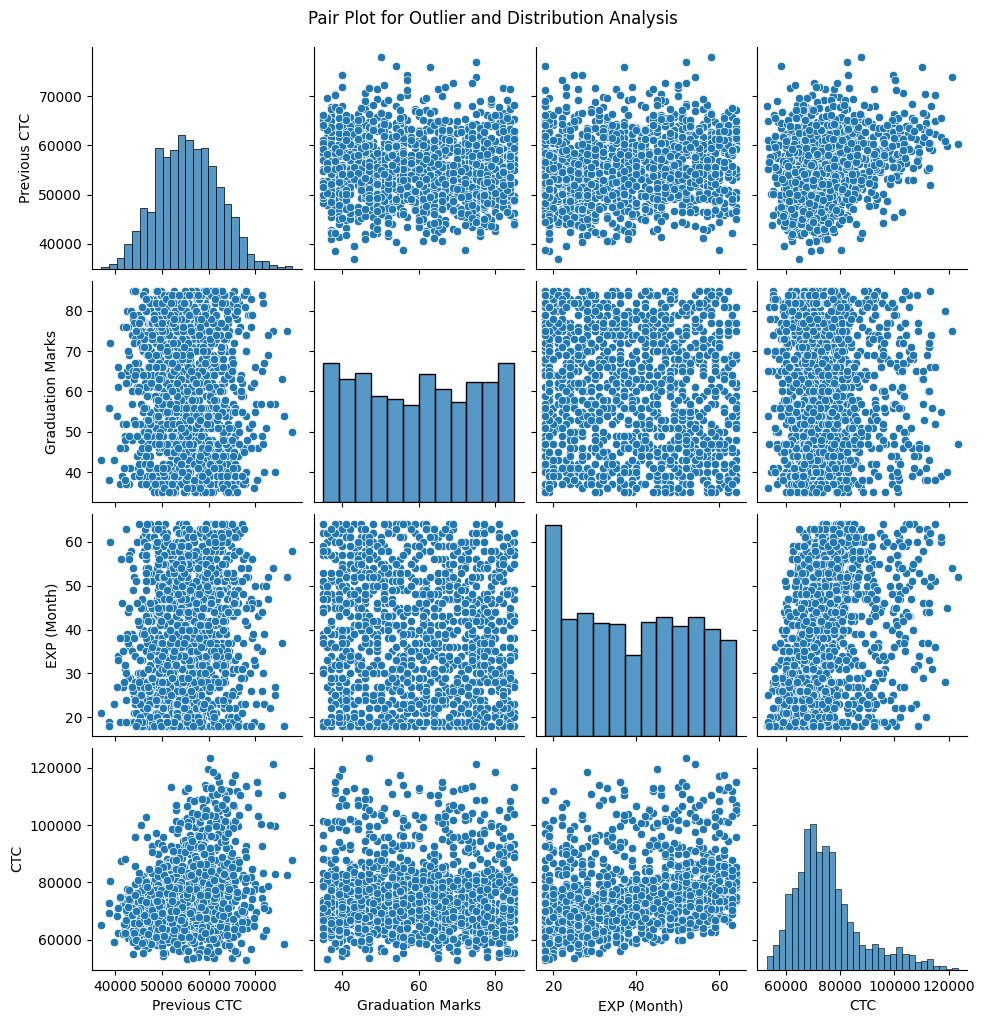

In [91]:
sns.pairplot(df2[['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']])
plt.suptitle("Pair Plot for Outlier and Distribution Analysis", y=1.02)
plt.show()


In [92]:
X=df2.loc[:,df2.columns!='CTC']
Y=df2['CTC']


In [93]:
#splitting into test and train datasets
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.2,random_state=42)


In [94]:
print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [95]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)
print(model.intercept_,model.coef_)

39182.41743854774 [-4.81517095e+02 -3.80847147e+02  4.10087094e-01  1.26562908e+02
  6.23658369e+00  2.61345898e+02  1.94874110e+04]


In [96]:
model=LinearRegression()
model.fit(x_train,y_train)
print(model.intercept_,model.coef_)

33756.18594885442 [-7.16420842e+01  8.34582257e+01  3.77624899e-01  3.54461022e+02
  2.79025879e+01  3.38911063e+02  2.28737974e+04]


In [97]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred) #test variables


0.4791178027399836

In [98]:
r2_score(y_train,y_train_pred)#train variables

0.6206217014961438

In [99]:
# Ridge and lasso
from sklearn import preprocessing
scalar=preprocessing.StandardScaler().fit(x_train)
x_train_s=scalar.transform(x_train)
x_test_s=scalar.transform(x_test)

In [100]:
from sklearn.linear_model import Ridge
model_R=Ridge(alpha=0.5)
model_R.fit(x_train_s,y_train)
r2_score(y_test, model_R.predict(x_test_s))

0.4796063294659094

In [101]:
from sklearn.model_selection import validation_curve
params_range=np.logspace(-2,8,100)
params_range


array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [102]:
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=params_range, scoring="r2")


In [103]:
print(train_scores,test_scores)

[[6.06655394e-01 6.23742456e-01 6.05778383e-01 6.54373138e-01
  6.22261569e-01]
 [6.06655394e-01 6.23742455e-01 6.05778382e-01 6.54373137e-01
  6.22261568e-01]
 [6.06655393e-01 6.23742454e-01 6.05778381e-01 6.54373136e-01
  6.22261568e-01]
 [6.06655391e-01 6.23742453e-01 6.05778379e-01 6.54373135e-01
  6.22261566e-01]
 [6.06655389e-01 6.23742450e-01 6.05778377e-01 6.54373132e-01
  6.22261564e-01]
 [6.06655385e-01 6.23742446e-01 6.05778372e-01 6.54373129e-01
  6.22261561e-01]
 [6.06655378e-01 6.23742440e-01 6.05778366e-01 6.54373122e-01
  6.22261556e-01]
 [6.06655369e-01 6.23742430e-01 6.05778355e-01 6.54373113e-01
  6.22261547e-01]
 [6.06655353e-01 6.23742414e-01 6.05778338e-01 6.54373097e-01
  6.22261534e-01]
 [6.06655328e-01 6.23742389e-01 6.05778311e-01 6.54373073e-01
  6.22261512e-01]
 [6.06655288e-01 6.23742348e-01 6.05778267e-01 6.54373034e-01
  6.22261478e-01]
 [6.06655224e-01 6.23742284e-01 6.05778199e-01 6.54372971e-01
  6.22261424e-01]
 [6.06655122e-01 6.23742182e-01 6.057780

In [104]:
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

In [105]:
max(test_mean)

0.5876972070188892

(array([30], dtype=int64),)

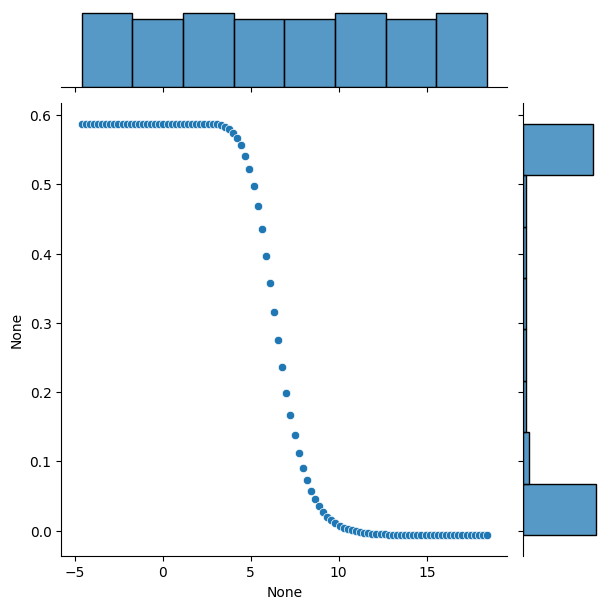

In [106]:
sns.jointplot(x=np.log(params_range),y=test_mean)
np.where(test_mean==max(test_mean))

In [107]:
np.where(test_mean==max(test_mean))

(array([30], dtype=int64),)

In [108]:
params_range[30]

10.722672220103231

In [109]:
model_R_best=Ridge(alpha=params_range[30])
model_R_best.fit(x_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [110]:
r2_score(y_test,model_R_best.predict(x_test_s))

0.4883717048013986

In [111]:
r2_score(y_train,model_R_best.predict(x_train_s))

0.6199382758627647

In [144]:
#regression tree
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score
reg_tree=tree.DecisionTreeRegressor(max_depth=3)
reg_tree.fit(x_train,y_train)
mse_rt=mean_squared_error(y_test,y_test_pred)
r2_Rt=r2_score(y_test,y_test_pred)
r21_Rt=r2_score(y_train,y_train_pred)

print(f"Regression Tree- Mse: {mse_rt}, R2: {r2_Rt}, R21: {r21_Rt}")

Regression Tree- Mse: 78306478.35982993, R2: 0.4791178027399836, R21: 0.6206217014961438


#### Plotting Decision Tree

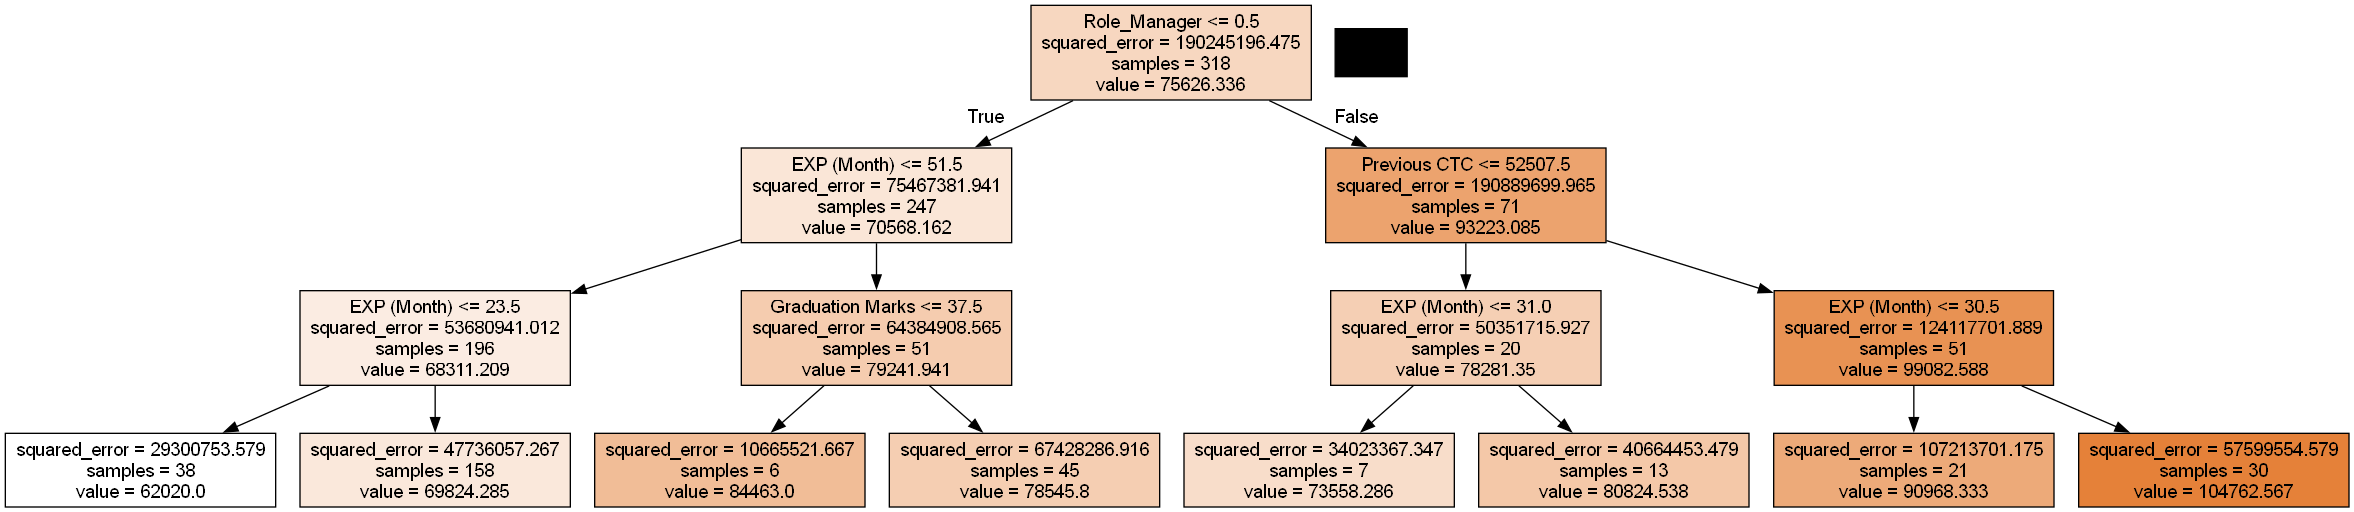

In [ ]:
dot_data= tree.export_graphviz(reg_tree,out_file=None,feature_names=x_train.columns,filled=True)
from IPython.display import Image
import pydotplus
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [117]:
import os
os.environ['PATH'] += r";C:\Program Files\Graphviz\bin"
print(os.environ['PATH'])



c:\Users\neela_ynpe59d\anaconda3\envs\myenv;C:\Users\neela_ynpe59d\anaconda3\envs\myenv;C:\Users\neela_ynpe59d\anaconda3\envs\myenv\Library\mingw-w64\bin;C:\Users\neela_ynpe59d\anaconda3\envs\myenv\Library\usr\bin;C:\Users\neela_ynpe59d\anaconda3\envs\myenv\Library\bin;C:\Users\neela_ynpe59d\anaconda3\envs\myenv\Scripts;C:\Users\neela_ynpe59d\anaconda3\envs\myenv\bin;C:\Users\neela_ynpe59d\anaconda3\condabin;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0;C:\windows\System32\OpenSSH;C:\Program Files\MySQL\MySQL Server 8.0\bin;C:\Program Files\HP\HP One Agent;C:\Program Files\Git\cmd;C:\Users\neela_ynpe59d\anaconda3;C:\Users\neela_ynpe59d\anaconda3\Scripts;C:\Users\neela_ynpe59d\anaconda3\Library\bin;C:\Users\neela_ynpe59d\AppData\Local\Microsoft\WindowsApps;C:\Users\neela_ynpe59d\AppData\Local\Programs\Microsoft VS Code\bin;C:\Program Files\Graphviz\bin;C:\Program Files\Graphviz\bin;C:\Program Files\Graphviz\bin


#### Bagging Technique

In [ ]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
Dc_bag=tree.DecisionTreeRegressor()
bag_reg=BaggingRegressor(base_estimator=Dc_bag,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
bag_reg.fit(x_train,y_train)
r2_bag=r2_score(y_test,bag_reg.predict(x_test))
r21_bag=r2_score(y_train,bag_reg.predict(x_train))
print(f"Bagging -R2: {r2_bag}, R21: {r21_bag}")


c:\Users\neela_ynpe59d\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging -R2: 0.4963368550048902, R21: 0.9536693799814532


#### Random Forest

In [138]:
from sklearn.ensemble import RandomForestRegressor
Rf_reg=RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state=42)
Rf_reg.fit(x_train,y_train)
y_pred=Rf_reg.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
r21_rf = r2_score(y_train,Rf_reg.predict(x_train))

print(f"Random Forest Regression - MSE: {mse_rf}, R2: {r2_rf}, R21: {r21_rf}")


Random Forest Regression - MSE: 75701845.21317726, R2: 0.4964434067628135, R21: 0.9537013509262517


In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
   'max_features': [3, 4, 5, 6, 7, 8, 9, 10], 
   'min_samples_split': [2, 3, 4, 6, 10, 12]  
}
grid_search = GridSearchCV(estimator=Rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(x_train, y_train)  
print("Best parameters:", grid_search.best_params_)
cvrf_reg = grid_search.best_estimator_
y_pred = cvrf_reg.predict(x_test)
y_pred_1=cvrf_reg.predict(x_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r21 = r2_score(y_train,y_pred_1)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"R-squared 1: {r21}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\neela_ynpe59d\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'max_features': 3, 'min_samples_split': 2}
Mean Squared Error: 69517145.49375995
R-squared: 0.5375830422913099
R-squared 1: 0.9543730198243688
